# Analysis of persons (from links in article text)

In [92]:
import pandas as pd
import json

#load about_pages
about_pages=pd.read_csv('de/all_data_bias_labour_gender_all_persons.csv',sep='\t', encoding='utf-8',index_col=0)#885
df=about_pages
df.male_amount.fillna(0, inplace=True)
df.female_amount.fillna(0, inplace=True)
df.rename(columns={"male_person_amount":"male_links","female_person_amount":"female_links",
                    "male_amount":"male_polyglot","female_amount":"female_polyglot"},inplace=True)
df.describe()

,male_links,female_links,female_polyglot,male_polyglot,male_all_amount,female_all_amount
count,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000
mean,3.033898,0.392090,0.874576,4.009040,4.848588,0.926554
std,12.024531,2.585406,3.557714,11.785696,14.342202,3.890211
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,3.000000,3.000000,0.000000
max,161.000000,61.000000,70.000000,175.000000,186.000000,78.000000


Populating the interactive namespace from numpy and matplotlib


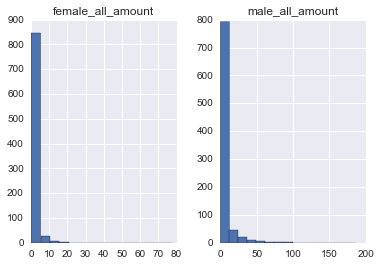

In [93]:
import seaborn as sns
%pylab inline
g=df.hist(bins=15,column=["male_all_amount","female_all_amount"])

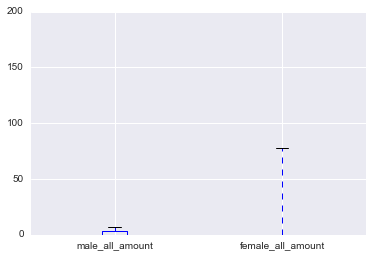

In [94]:
df.boxplot(return_type='axes',column=["male_all_amount","female_all_amount"])

# Remove data where there is no persons at all

In [95]:
#Remove data where there is no male person neither female  simultaneously
df_0=df[(df.male_all_amount==0)& (df.female_all_amount==0)]#474
df=df[(df.male_all_amount>0)| (df.female_all_amount>0)]#411
print "There are ",len(df),"profesions with at least one person"
df.describe()

There are  411 profesions with at least one person


,male_links,female_links,female_polyglot,male_polyglot,male_all_amount,female_all_amount
count,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000
mean,6.532847,0.844282,1.883212,8.632603,10.440389,1.995134
std,16.995143,3.745578,5.038485,16.108286,19.621000,5.522016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,0.000000,0.000000,3.000000,3.000000,1.000000
75%,5.000000,0.000000,2.000000,9.000000,11.000000,2.000000
max,161.000000,61.000000,70.000000,175.000000,186.000000,78.000000


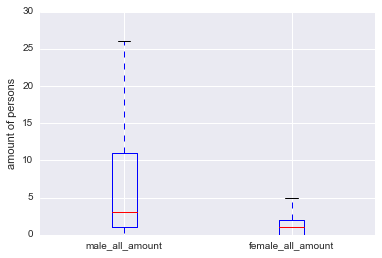

In [96]:
g=df.boxplot(return_type='axes',column=["male_all_amount","female_all_amount"])
plt.ylim(0,30)
#plt.xlabel("n=411")
plt.ylabel("amount of persons")
plt.show()

Mean of male person ratio:  0.827957377247


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


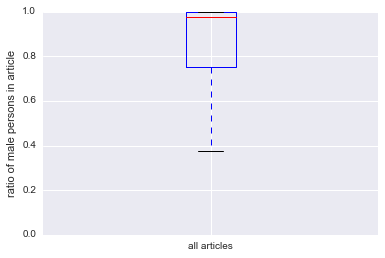

In [97]:
df["m_normalized"]=df.apply(lambda x: float(x["male_all_amount"])/float(x["male_all_amount"] + x["female_all_amount"]), axis = 1)
g=df.boxplot(column="m_normalized", return_type="axes")
plt.xticks([1],["all articles"])
plt.ylabel("ratio of male persons in article")
print "Mean of male person ratio: ",df.m_normalized.mean()

### Group by redirection bias

Bias
female       2
male       371
neutral     38
dtype: int64
Median Bias
female     0.230263
male       0.989011
neutral    0.834821
Name: m_normalized, dtype: float64


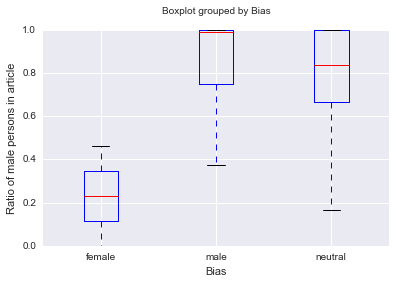

In [124]:
#data=pd.read_csv("de/wiki/all_wiki_pages.csv",sep='\t', encoding='utf-8',index_col=0) 
#df["Bias"]=df.apply(lambda x: data[data.WikiName.isin([x.name])].Bias.values[0], axis =1)
print df.groupby("Bias").size()
print "Median",df.groupby("Bias").m_normalized.median()
g=df.boxplot(by='Bias',column="m_normalized",bootstrap=200000, return_type="axes")#notch=True

plt.ylabel("Ratio of male persons in article")
plt.title("")
plt.ylim(0,1)
plt.show()
#plt.xticks(range(1,4),["female\nn=2","male\nn=371","neutral\nn=38"])

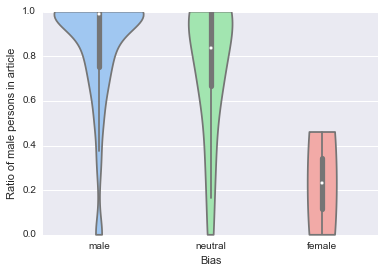

In [120]:
with sns.color_palette("pastel", 3):#Set2
    sns.violinplot(y="m_normalized",x="Bias",data=df,cut=0,inner="box")
    plt.ylim(0,1)
    plt.ylabel("Ratio of male persons in article")
    plt.show()

In [100]:
#significance test
from scipy import stats  

m_val=df[df.Bias=="male"].m_normalized.values
f_val=df[df.Bias=="female"].m_normalized.values
n_val=df[df.Bias=="neutral"].m_normalized.values
z_stat, p_val = stats.ranksums(m_val, f_val)   
print "MWW RankSum P for male and female distributions =", p_val , "z_stat=",z_stat
z_stat, p_val = stats.ranksums(m_val, n_val)   
print "MWW RankSum P for male and neutral distributions =", p_val , "z_stat=",z_stat
z_stat, p_val = stats.ranksums(f_val, n_val)   
print "MWW RankSum P for female and neutral distributions =", p_val , "z_stat=",z_stat
all_together=list(m_val)+ list(f_val)+ list(n_val)
z_stat, p_val = stats.ranksums(all_together, m_val)  
print "MWW RankSum P for all together and male distributions =", p_val ,"z_stat=",z_stat
z_stat, p_val = stats.ranksums(all_together, f_val)  
print "MWW RankSum P for all together and female distributions =", p_val  , "z_stat=",z_stat
z_stat, p_val = stats.ranksums(all_together, n_val)  
print "MWW RankSum P for all together and neutral distributions =", p_val  , "z_stat=",z_stat

MWW RankSum P for male and female distributions = 0.0278333881087 z_stat= 2.19962674404
MWW RankSum P for male and neutral distributions = 0.0797603410988 z_stat= 1.75207832297
MWW RankSum P for female and neutral distributions = 0.054383172481 z_stat= -1.9237719688
MWW RankSum P for all together and male distributions = 0.623032738385 z_stat= -0.491556730376
MWW RankSum P for all together and female distributions = 0.0299757457316 z_stat= 2.1704107159
MWW RankSum P for all together and neutral distributions = 0.12152014956 z_stat= 1.54842440336


| | p-val | z |
| :-|:-:|:-:|
| male bias professions & female bias professions |    0.027     |   2.19    | 
| male bias professions & nuetral professions |    0.079     |   1.75    | 
| female bias professions & neutral professions |    0.054     |   -1.92    | 
| all_together & male bias professions |     0.623    |     -0.49    | 
| all_together & female bias professions |     0.029    |     2.17    | 
| all_together & neutral professions |     0.121    |     1.54    | 

### Group by gender of profession label

prof_gender
female      11
male       376
neutral     24
dtype: int64


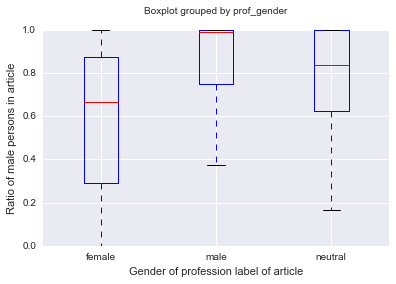

In [112]:
print df.groupby("prof_gender").size()
g=df.boxplot(column="m_normalized",by="prof_gender",return_type='axes')#showmeans=True,ntch=True
plt.title("")
plt.ylabel("Ratio of male persons in article")
plt.xlabel("Gender of profession label of article")
plt.show()

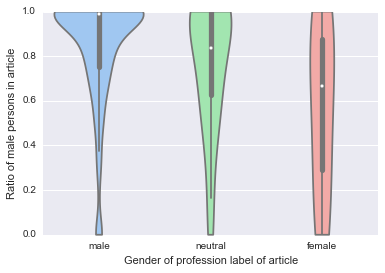

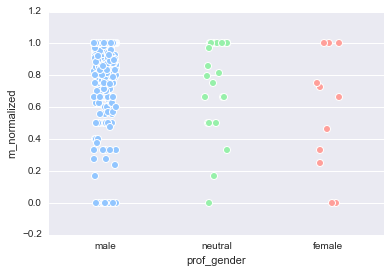

In [85]:
with sns.color_palette("pastel", 3):#Set2
    sns.violinplot(y="m_normalized",x="prof_gender",data=df,cut=0,inner="box"),
    plt.ylim(0,1)
    plt.ylabel("Ratio of male persons in article")
    plt.xlabel("Gender of profession label of article")
    plt.show()
#Draw each level of the hue variable at different locations on the major categorical axis
sns.stripplot(x="prof_gender",y="m_normalized",order=["male","neutral","female"],
               data=df,jitter=True,palette="pastel")#,hue="smoker",split=True)

In [15]:
#significance test:

#significance test
from scipy import stats  

m_val=df[df.prof_gender=="male"].m_normalized.values
f_val=df[df.prof_gender=="female"].m_normalized.values
n_val=df[df.prof_gender=="neutral"].m_normalized.values
z_stat, p_val = stats.ranksums(m_val, f_val)   
print "MWW RankSum P for male and female distributions =", p_val , "z_stat=",z_stat
z_stat, p_val = stats.ranksums(m_val, n_val)   
print "MWW RankSum P for male and neutral distributions =", p_val , "z_stat=",z_stat
z_stat, p_val = stats.ranksums(f_val, n_val)   
print "MWW RankSum P for female and neutral distributions =", p_val , "z_stat=",z_stat
all_together=list(m_val)+ list(f_val)+ list(n_val)

z_stat, p_val = stats.ranksums(all_together, m_val)  
print "MWW RankSum P for all together and male distributions =", p_val ,"z_stat=",z_stat
z_stat, p_val = stats.ranksums(all_together, f_val)  
print "MWW RankSum P for all together and female distributions =", p_val  , "z_stat=",z_stat
z_stat, p_val = stats.ranksums(all_together, n_val)  
print "MWW RankSum P for all together and neutral distributions =", p_val  , "z_stat=",z_stat

MWW RankSum P for male and female distributions = 0.0137464452259 z_stat= 2.46382175804
MWW RankSum P for male and neutral distributions = 0.195718220482 z_stat= 1.29384715635
MWW RankSum P for female and neutral distributions = 0.150120822242 z_stat= -1.4391048354
MWW RankSum P for all together and male distributions = 0.612944588906 z_stat= -0.505874735965
MWW RankSum P for all together and female distributions = 0.0183522811603 z_stat= 2.35843282163
MWW RankSum P for all together and neutral distributions = 0.263068072848 z_stat= 1.1191689413


| | p-val | z |
| :-|:-:|:-:|
| male professions & female professions |    0.013     |   2.46    | 
| male professions & neutral professions |    0.195     |   1.29    | 
| female professions & neutral professions |    0.15     |   -1.43    | 
| all_together & male profession |     0.612    |     -0.50    | 
| all_together & female profession |     0.018    |     2.35    | 
| all_together & neutral profession |     0.263    |     1.11    | 

### Group by Labor market

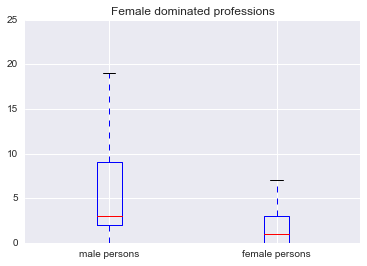

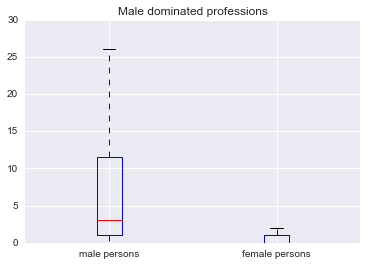

In [114]:
female_most_people=df[df.labor_market_domin=="female"]
male_most_people=df[df.labor_market_domin=="male"]

g=female_most_people.boxplot(return_type='axes',column=["male_all_amount","female_all_amount"])
plt.ylim(0,25)
plt.xticks([1,2],["male persons","female persons"])
plt.title("Female dominated professions")
plt.show()

g=male_most_people.boxplot(return_type='axes',column=["male_all_amount","female_all_amount"])
plt.ylim(0,30)
plt.xticks([1,2],["male persons","female persons"])
plt.title("Male dominated professions")
plt.show()

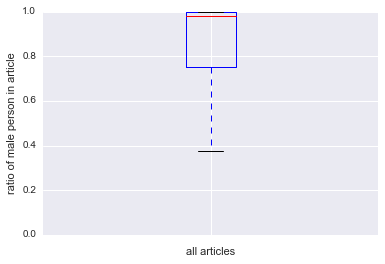

Ratio of male persons in all articles (mean): 0.827989756752


In [76]:
#only data where we have labour market statistics
df_all=df[~df.labor_market_domin.isnull()]

df_all.boxplot(column="m_normalized",return_type='axes')
plt.xlabel("all articles")
plt.xticks([1],"")
plt.ylabel("Ratio of male person in article")
plt.show()
print "Ratio of male persons in all articles (mean):",df_all.m_normalized.mean(

labor_market_domin
female    153
male      251
dtype: int64
Ratio of male persons in articles about female dominated profesion(mean): 0.768219758851
Ratio of male persons in articles about male dominated profesion(mean): 0.864423261448


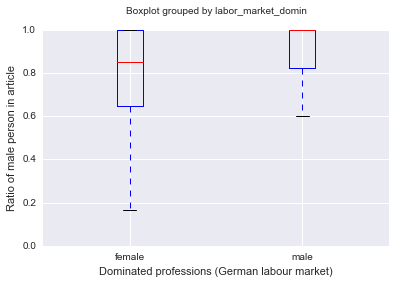

In [110]:
m_val=df_all[df_all.labor_market_domin=="male"].m_normalized.values
f_val=df_all[df_all.labor_market_domin=="female"].m_normalized.values
print df_all.groupby("labor_market_domin").size()
g_b_m=df_all.boxplot(column="m_normalized",return_type='axes',by="labor_market_domin")
plt.title("")#"ratio of men in artcles for professions where there are less than 50% female")
plt.xlabel("Dominated professions (German labour market)")
plt.ylabel("Ratio of male person in article")
print "Ratio of male persons in articles about female dominated profesion(mean):",df_all[df_all.labor_market_domin=="female"].m_normalized.mean()
print "Ratio of male persons in articles about male dominated profesion(mean):",df_all[df_all.labor_market_domin=="male"].m_normalized.mean()

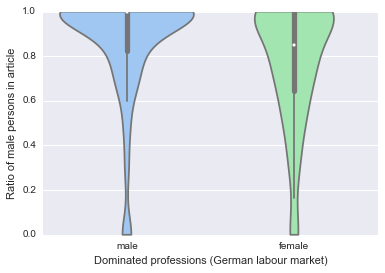

In [82]:
with sns.color_palette("pastel", 2):#Set2
    sns.violinplot(y="m_normalized",x="labor_market_domin",data=df,cut=0,inner="box")
    plt.ylim(0,1)
    plt.ylabel("Ratio of male persons in article")
    plt.xlabel("Dominated professions (German labour market)")
    plt.show()

[]

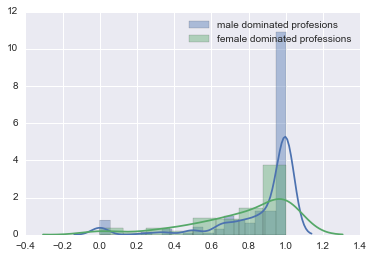

In [80]:
import seaborn as sns
g1=sns.distplot(m_val,label="male dominated profesions")
g2=sns.distplot(f_val,label="female dominated professions")
g2.legend()
#g2.set_xlim(0,1)
g2.plot()

In [42]:
from scipy import stats  
#(also called the Mann–Whitney–Wilcoxon (MWW), Wilcoxon rank-sum test, or Wilcoxon–Mann–Whitney test
z_stat, p_val = stats.ranksums(m_val, f_val)   
print "MWW RankSum P for male and female distributions =", p_val , "z_stat=",z_stat
all_together=list(m_val)+ list(f_val)
z_stat, p_val = stats.ranksums(all_together, m_val)  
print "MWW RankSum P for all together and male distributions =", p_val ,"z_stat=",z_stat
z_stat, p_val = stats.ranksums(all_together, f_val)  
print "MWW RankSum P for all together and female distributions =", p_val  , "z_stat=",z_stat
#The Wilcoxon rank-sum test tests the null hypothesis that two sets of measurements are drawn from the same distribution.
#The alternative hypothesis is that values in one sample are more likely to be larger than the values in the other sample.

MWW RankSum P for male and female distributions = 2.65933602087e-05 z_stat= 4.20083393862
MWW RankSum P for all together and male distributions = 0.0422283316193 z_stat= -2.03126291086
MWW RankSum P for all together and female distributions = 0.00478848493682 z_stat= 2.82092866718


| | p-val | z |
| :-|:-:|:-:|
| male professions & female professions |    2.66e-05     |   4.20    | 
| all_together & female profession |     0.0422    |     -2.03    | 
| all_together & male profession |     0.0047    |     2.82    | 

In [43]:
#Mann–Whitney U test 
print stats.mannwhitneyu(m_val, f_val)
# Mann-Whitney U is significant if the u-obtained is LESS THAN or equal to the critical value of U.

print stats.ks_2samp(m_val, f_val)#Kolmogorov-Smirnov statistic

MannwhitneyuResult(statistic=14419.0, pvalue=3.9457272724350954e-06)
Ks_2sampResult(statistic=0.25102205556857543, pvalue=9.0648485575840875e-06)



    A measure of the central tendencies of the two groups (means or medians; since the Mann–Whitney is an ordinal test, medians are usually recommended)
    The value of U
    The sample sizes
    The significance level.


## Distribution visualisation

(0, 200.0)

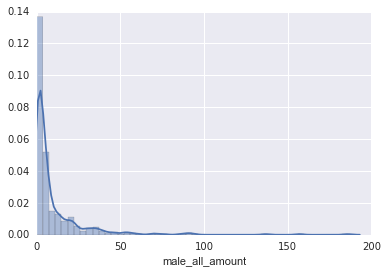

In [27]:
import seaborn as sns
#sns.set(color_codes=True)
g=sns.distplot(df.male_all_amount)
g.set_xlim(0,)

(0, 80.0)

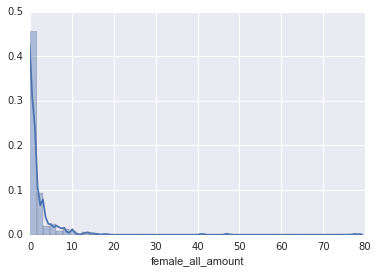

In [28]:
g=sns.distplot(df.female_all_amount)
g.set_xlim(0,)

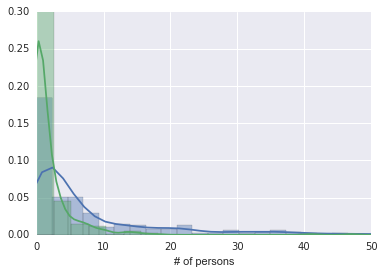

In [29]:
g1=sns.distplot(df.male_all_amount,bins=80)
g2=sns.distplot(df.female_all_amount,bins=30, kde_kws={"bw":1})
g1.set_xlim(0,50)
g1.set_ylim(0,0.3)
g1.set_xlabel("# of persons")

### Comulative distribution

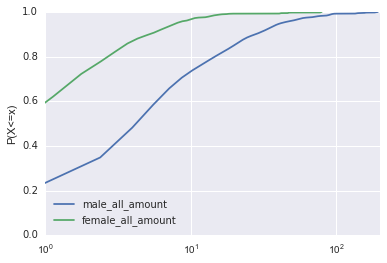

In [30]:
g=sns.kdeplot(df.male_all_amount,cumulative=True)#,linestyle="dotted")
g1=sns.kdeplot(df.female_all_amount,cumulative=True)
#g.set_ylim(1, 0)
g.set_xlim(1,)
g.set_xscale('log')
g.set_ylabel("P(X<=x)")

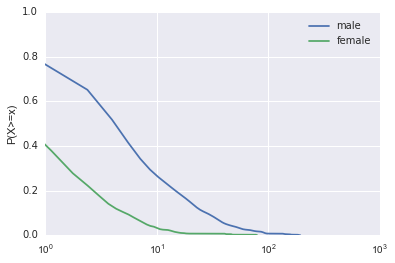

In [31]:
line = g.lines[0]
plt.plot(line.get_xdata(),1-line.get_ydata(), label="male")
line2=g.lines[1]
plt.plot(line2.get_xdata(),1-line2.get_ydata(), label="female")
plt.xscale("log")
plt.xlim(1,)
plt.legend()
plt.ylabel("P(X>=x)")

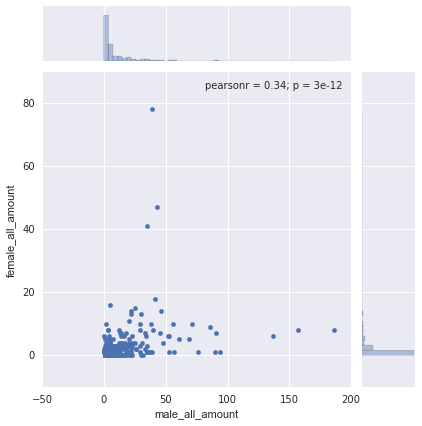

In [32]:
g=sns.jointplot(x="male_all_amount", y="female_all_amount", data=df);

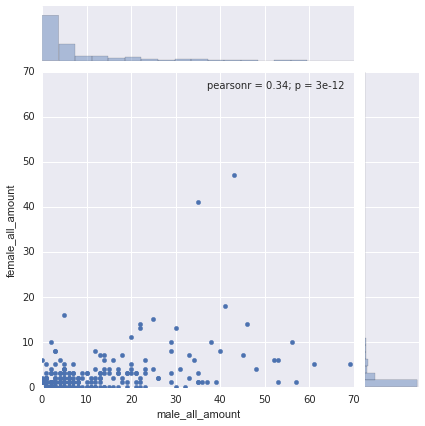

In [33]:
g=sns.jointplot(x="male_all_amount", y="female_all_amount",data=df, xlim=(0,70), ylim=(0,70))

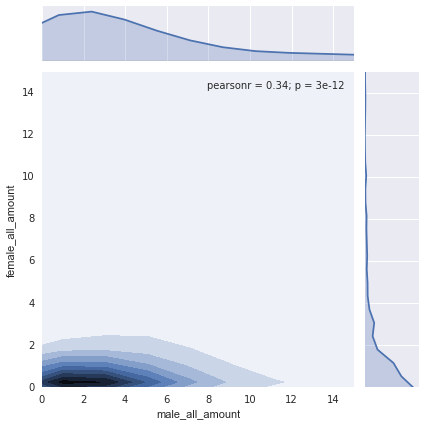

In [34]:
g=sns.jointplot(x="male_all_amount", y="female_all_amount",data=df, kind="kde",xlim=(0,15), ylim=(0,15))
#g.plot_joint(plt.scatter, c="black", s=30, linewidth=1, marker="+")

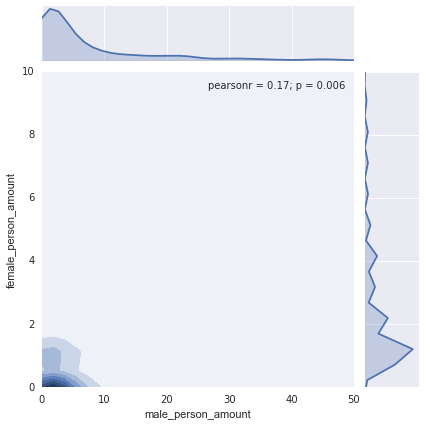

In [47]:
g=sns.jointplot(x="male_all_amount", y="female_all_amount",data=df, kind="kde",xlim=(0,50), ylim=(0,10))
#g.plot_joint(plt.scatter, c="black", s=30, linewidth=1, marker="+")

194


(0, 90.0)

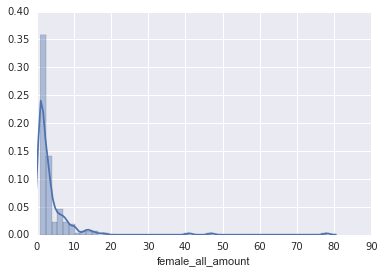

In [36]:
#del all where female zero
df3=df[(df.male_all_amount!=0) & (df.female_all_amount!=0)]#194
print len(df3)
g=sns.distplot(df3.female_all_amount)
g.set_xlim(0,)